# Week Four - Advanced Topics in Python

## Learning Objectives: 
For the first three weeks you been learning the basics of programming in Python -- enough to begin exploring further on your own. In the final week of this module I want to give you a taste of the real power of Python programming. **Do not worry if you don't understand everything.** Just follow along in the notebooks to see the possibilities. Some of the tasks will continue to follow our Martian theme, but I'll include some down-to-Earth examples to get you thinking about ways you might use programming in your own career (assuming you don't go to Mars).

I think you'll be surprised at how much you actually do understand, and I hope you'll be inspired to investigate further on your own!  But some of this stuff is tricky, so don't rush through the notebooks.  ** Read everything carefully.**

## Three themes will comprise our final week:
1. ** Advanced data input: Class 10 **
2. ** Advanced data analysis: Class 11 **
3. ** Advanced data display: Class 12 **

<a id='Top'/a>
## Class 10: Advanced Data Input
[Top of Notebook](#Top)
Until now we have either typed in the data, read a text file, or read numbers from a comma-separated variable (CSV) file. The internet is all about data, but before you can analyze it you have to be able to read it. 

In this class we will look at:
- [Loading data from an Excel spread sheet](#Excel)
- [Loading data from a Google Spreadsheet.](#Googlesheet)
- [Loading a JSON file](#JSON)
- [Scraping a web page](#Scraping)

And, of course, we'll finish with a:
- [Martian Mission](#Mission)


<a id='Excel'/a>
## Loading data from an Excel Spreadsheet
[Top of Notebook](#Top)

In your Class10 folding I've included the file 'PopularKids.xls'

According to: http://mercury.webster.edu/aleshunas/Data%20Sets/Supplemental%20Excel%20Data%20Sets.htm

This dataset of 478 instances was obtained from http://lib.stat.cmu.edu/DASL/Datafiles/PopularKids.html		
		
A sample of 478 students in grades 4 - 6 were selected from urban, suburban, and rural school		
districts with approximately 1/3 of the sample coming from each district. The students were		
asked whether making good grades, being good at sports, or being popular were what they		
most liked to achieve at school. They were also asked to rank in order of importance		
the following factors that would make them popular among their friends: making good grades,		
being good at sports, being handsome or pretty, and having lots of money. They were also		
asked their gender, grade level, and other demographic information.		

** Note: This is just an example. I'm not endorsing the research. **
		
Attributes with possible values:		
Gender: boy, girl		
Grade: 4, 5, 6		
Age: 7,9, 10, 11, 12, 13		
Race: Other, White		
Urban/Rural: Rural, Suburban, Urban		
School: Brentwood Elementary, Brentwood Middle, Brown Middle, Elm, Main, Portage, Ridge, Sand, Westdale Middle		

Goals: Grades, Popular, Sports (Goals students chose that they most wished to achieve at school)
Factors students ranked in order of importance that would make them popular among their friends.

(1 = most important, 4 = least important)

Grades: 1, 2, 3, 4		
Sports: 1, 2, 3, 4		
Looks: 1, 2, 3, 4		
Money: 1, 2, 3, 4		

** There are many ways to read in Excel files, but the pandas library we used when we looked at the Indego bike data is one of the easiest.**

In [1]:
import numpy as np
import pandas as pd

# Load the file into a pandas dataframe
kids = pd.read_excel('PopularKids.xls')

# Print the first ten rows
kids.head(10)

,Gender,Grade,Age,Race,Urban/Rural,School,Goals,Grades,Sports,Looks,Money
0,boy,5,11,White,Rural,Elm,Sports,1,2,4,3
1,boy,5,10,White,Rural,Elm,Popular,2,1,4,3
2,girl,5,11,White,Rural,Elm,Popular,4,3,1,2
3,girl,5,11,White,Rural,Elm,Popular,2,3,4,1
4,girl,5,10,White,Rural,Elm,Popular,4,2,1,3
5,girl,5,11,White,Rural,Elm,Popular,4,2,1,3
6,girl,5,10,White,Rural,Elm,Popular,3,4,1,2
7,girl,5,10,White,Rural,Elm,Grades,3,4,2,1
8,girl,5,10,White,Rural,Elm,Sports,3,2,1,4
9,girl,5,10,White,Rural,Elm,Sports,4,3,2,1


In [2]:
# How many rows and columns?
kids.shape

(478, 11)

So the shape() function told us this data set has 478 rows and 11 columns.

In [3]:
# Let's see which factors the kids thought were most important (1 = most, 4 = least)
kids.describe()

,Grade,Age,Grades,Sports,Looks,Money
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,5.133891,10.422594,2.617155,2.085774,2.100418,3.196653
std,0.784321,0.978421,1.080550,0.983601,1.069081,0.948920
min,4.000000,7.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,10.000000,2.000000,1.000000,1.000000,3.000000
50%,5.000000,11.000000,3.000000,2.000000,2.000000,3.000000
75%,6.000000,11.000000,4.000000,3.000000,3.000000,4.000000
max,6.000000,13.000000,4.000000,4.000000,4.000000,4.000000


The describe() function applied to a pandas dataframe returns summary statistics for all of the columns. Very slick!

Looking at the averages (mean), the kids ranked them from most important to least important as: sports, looks, grades and money. I wonder what the results would be for college students?

Well, I can't resist playing with the data a little.  Let's see how their opinions change with age from 7 to 13.

In [4]:
# Group the data frame by ages
by_age = kids.groupby('Age')

# Find the averages for each age group
# agg is short for "aggregate", in this case by mean value
averages = by_age.agg(np.mean)

# Display the averages for the columns of interest
averages[['Grades', 'Sports','Looks', 'Money']]

,Grades,Sports,Looks,Money
Age,,,,
7,1.000000,2.000000,3.000000,4.000000
9,2.380000,2.340000,2.190000,3.090000
10,2.348485,2.037879,2.318182,3.295455
11,2.857143,2.058201,1.899471,3.185185
12,2.903846,1.807692,2.096154,3.192308
13,2.750000,2.250000,2.000000,3.000000


In [38]:
# How many kids in each age group?
print(by_age.size())

Age
7       1
9     100
10    132
11    189
12     52
13      4
dtype: int64


There was only one 7 year so the numbers for age 7 are just that kid's selection.  There were no 8 year olds in the data set, so that row is missing. I don't know why so don't ask.

Isn't it interesting, and perhaps a bit sad, that the one seven year old thought grades where most important, but with age looks and athletic ability quickly become the most important factors? Well, maybe that kid's not typical. We really should limit comparison to ages where we have a lot of data.

In [48]:
# Look at just the nine year olds
age9 = by_age.get_group(9)
age9.head(5)

,Gender,Grade,Age,Race,Urban/Rural,School,Goals,Grades,Sports,Looks,Money
12,boy,4,9,White,Rural,Elm,Popular,2,3,4,1
13,boy,4,9,White,Rural,Elm,Popular,4,2,3,1
14,boy,4,9,Other,Rural,Elm,Popular,4,3,2,1
15,girl,4,9,White,Rural,Elm,Grades,1,3,2,4
16,girl,4,9,White,Rural,Elm,Sports,3,1,2,4


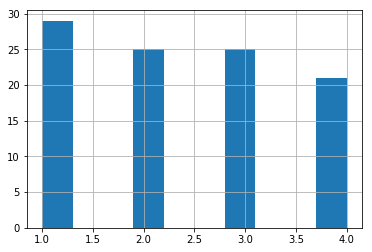

In [50]:
# Look at the importance this group assigns to grades
age9['Grades'].hist()

### Student Challenge
Create a similar histogram for the 11 year olds and comment on any changes you see between the 9 and 11 year olds.

### Students: add your interpretation here: 

<a id='Googlesheet'/a>
## Loading data from a Google Spreadsheet
[Top of Notebook](#Top)

The ability to load data from a Google spreadsheet is exciting because you can share Google spreadsheets with others to create a collaborative document. If you email the link to a bunch of friends, each can enter their own data, and you can use Python to compile the results automatically. 

For example, in my Gen Ed class, "Disasters, Geology vs. Hollywood," I challenge students to guess where on the Earth the biggest earthquake will occur each week. They enter three place names along with the latitude and longitude. Each week I download and plot their picks automatically and determine a winner by calculating who is closest to the actual biggest earthquake of the past 7 days. Doing this by hand would take considerable effort, but it only takes me a minute to run my Python script.  Automating boring stuff is one of the advantages of learning to program.

### Class Height
To get an idea of how this works, I've created a Google Spreadsheet for you to enter your name and your height in inches. I've already entered my data, and so has one of my graduate students. Here is the spreadsheet link.

https://docs.google.com/spreadsheets/d/1IvuiznSgfpGb7YTrizOBQKZ3FneqNeegV4wq1giJ1gA/edit?usp=sharing

### Student Challenge
*** Go to this spreadsheet and add your own information. Just open another tab on your browser. ***

Now let's access these data from Python.  Because this spreadsheat is "public" this is not hard to do. Private spreadsheets require password or token-based authentification, which is a bit trickier.

The spreadsheet above's link is a long string of characters, but notice at the end of the URL is: /edit?usp=sharing
telling us that this a link for a shared sheet and that it is editable. This part at the end is a 'request' that is added to the URL (web address). When you do an ordinary google search for any word you'll see your search terms added to the URL as a request (Try it in another browser tab). For example, when I search for "python" in a Google spreadsheet, the following URL is generated when I hit enter:
https://www.google.com/search?q=python&oq=python&aqs=chrome..69i57j69i60l3j69i65j69i59.5701j0j4&sourceid=chrome&ie=UTF-8

We actually want the Googlesheet request to return a CSV file (comma separated variable file) with the data when the URL is sent, so we have to modify the URL slightly. You'll see that in the code below.

We used the Python module "requests" to send the web requests and the module "StingIO" (IO stands for input/output) to decode the result.

In [5]:
from io import StringIO
import requests
import pandas as pd

# requests sends the string to the web server and provides an object to access the returned data
# Notice the format=csv at the end of the URL string.
sheet_url = 'https://docs.google.com/spreadsheets/d/1IvuiznSgfpGb7YTrizOBQKZ3FneqNeegV4wq1giJ1gA/export?format=csv'
r = requests.get(sheet_url)

# Need to use decode as .content returns bytes. UTF-8 (https://en.wikipedia.org/wiki/UTF-8) is a way 
# to encode characters that can handle all sorts
# of symbols such as arabic and chinese characters.
# At this point 'data' holds the contents of the CSV file in a big ol' string variable.
data = r.content.decode('utf-8')

# Now use pandas to read the CSV data from the string into a dataframe
# Notice that we use SringIO to read from string variable instead of opening a file.
df = pd.read_csv(StringIO(data))

# Display the dataframe
df

,Name,Height_In_Inches
0,Dr. Nyquist,72
1,Chelsea,67


As other students add data to the Googlesheet the result of running this cell will update each time you run it.
This is pretty cool!

Note, this technique works only for a public spreadsheet. If you want Python to access a private spreadsheet the method is slightly more complicated because you have to pass authentification information in a way that doesn't make your password visible within your code.

*** The trick where you add something to the end of your URL to form a request, query, etc. is a way to communicate with web servers that offer a RESTful API.  What is a RESTful API? I'm glad you asked!***

## RESTful API

Posted by: Margaret Rouse
WhatIs.com

> A RESTful API is an application program interface (API) that uses HTTP requests to GET, PUT, POST and DELETE data.

> Representational state transfer (REST), which is used by browsers, can be thought of as the language of the Internet. Now that cloud usage is on the rise, various application programming interfaces (APIs) are emerging to expose Web services and REST is a logical choice for building APIs that allow end users to connect and interact with cloud services. RESTful APIs are used by many sites, including Google, Amazon, Twitter and LinkedIn.

You'll get another chance to use a RESTful API in the Martian Challenge at the end of this notebook.




<a id='JSON'/a>
## Loading data from a JSON file
[Top of Notebook](#Top)

The most common programming language of the web is Javascript. Storing data in [Java Script Object Notation](https://en.wikipedia.org/wiki/JSON) (JSON) format is very common. Not to worry, you don't have to learn Javascript (Which all right-thinking programmers agree is yucky). Python can read JSON files because, no surprise, someone has written a module for it. Actually, the JSON file format is very similar to a Python dictionary, so you almost don't need this module.

Data is often served up by an Application Programmer's Interface (API). Meaning you send a query and data is returned as you desired. Just as in the example above, the query is stuff added to the URL. For this example we are going to ask for information from the [Open Movie Database](http://www.omdbapi.com/). Their website is cool because they show you how to construct the query string. To get information about the plot of, what else, "The Martian" (if by some tragic twist of fate you didn't see the movie), the query we need is: http://www.omdbapi.com/?t=The+Martian&y=&plot=short&r=json

Notice the bits added to the end of the URL? There is t= for title, plot= for, well duh, plot, and r= for the format of the returned data, which you can see is json.

Let's see how to perform this query from Python and display the results.

In [6]:
import requests
import json

# Notice that the request below asks for a short version of the plot
url = 'http://www.omdbapi.com/?t=The+Martian&y=&plot=short&r=json'

# Make the request
r = requests.get(url)

# Convert from bytes to unicode string
data = r.content.decode('utf-8')

# Load the data from the json string into a Python dictionary
martian = json.loads(data)

# Print the whole dictionary so you can see all the key:value pairs.
print(martian)

{'Title': 'The Martian', 'Year': '2015', 'Rated': 'PG-13', 'Released': '02 Oct 2015', 'Runtime': '144 min', 'Genre': 'Adventure, Drama, Sci-Fi', 'Director': 'Ridley Scott', 'Writer': 'Drew Goddard (screenplay), Andy Weir (based on the novel by)', 'Actors': 'Matt Damon, Jessica Chastain, Kristen Wiig, Jeff Daniels', 'Plot': 'An astronaut becomes stranded on Mars after his team assume him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.', 'Language': 'English, Mandarin', 'Country': 'USA, UK', 'Awards': 'Nominated for 7 Oscars. Another 34 wins & 179 nominations.', 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTc2MTQ3MDA1Nl5BMl5BanBnXkFtZTgwODA3OTI4NjE@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '92%'}, {'Source': 'Metacritic', 'Value': '80/100'}], 'Metascore': '80', 'imdbRating': '8.0', 'imdbVotes': '549,548', 'imdbID': 'tt3659388', 'Type': 'movie', '

The result is a dictionary. We can print any element in the usual way by passing using the dictionary key.

In [7]:
print(martian.keys())

dict_keys(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response'])


In [8]:
# Try one of the keys. Print the plot summary.
print(martian['Plot'])

An astronaut becomes stranded on Mars after his team assume him dead, and must rely on his ingenuity to find a way to signal to Earth that he is alive.


### Student Challenge
See if you can retrieve the plot for a different movie of your choosing.

<a id='JSON'/a>
## Scraping a Web Page
[Top of Notebook](#Top)

Many web pages display data in the form of a table, but do not provide any type of API, RESTful or unRESTful. Sure, you could cut and paste from the web page to get your data, but if the web page changes frequently cutting and pasting could get real old, real fast. 

The answer is to write a "web scraper," which is a program that pulls the data directly from the web page. The most popular Python module written to scrape the web is called [beautiful soup](http://www.pythonforbeginners.com/beautifulsoup/beautifulsoup-4-python), a reference to Lewis Carroll and the Mock Turtle.  Since the beautiful soup module is designed to work directly with web pages, it helps to know something about HTML and XML, the formating language of the web. Don't worry, you only need to know a little.

If you're just after tables, however, the pandas module can generally do the trick. First we use the urllib module to read the raw HTML from the target webpage.

For this example we'll be looking at the latest golf player rankings. Not that I care about golf, but this is an example of a table on a webpage that changes regularly.  **Take a look at the website to see that table we're trying to scrape:** http://www.owgr.com/ranking

In [9]:
from bs4 import BeautifulSoup
import urllib

# Read the webpage
r = urllib.request.urlopen('http://www.owgr.com/ranking').read()

# Parse it into components (title, tables, etc., with the Python module lxml )
soup = BeautifulSoup(r, "lxml")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [10]:
# Print the first 1000 characters in the web page to give you an idea what it looks like
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <link href="/styles/css/font-awesome.min.css" rel="stylesheet"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <title>
   Official World Golf Ranking - Ranking
  </title>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="en" http-equiv="content-language"/>
  <link href="http://fonts.googleapis.com/css?family=Lato:300,400,700italic" rel="stylesheet" type="text/css"/>
  <link href="/styles/css/normalize.min.css?ov=12" rel="stylesheet" type="text/css"/>
  <link href="/styles/css/mobile.css?ov=12" rel="stylesheet" type="text/css"/>
  <link href="/styles/css/tablet.css?ov=12" rel="styles

All that stuff between angle brackets? That is HTML (Hypertext Markup Language).  So, for example, the title of the web page appears between < title \> and < /title \>.  The part we are looking for is the table, which appears a little further down with the key word < table >

In [11]:
table = soup.find('table')
print(table)

<table>
<thead>
<tr>
<th class="thwk header">This Week</th>
<th class="mht ws header">Last week</th>
<th class="mht ws header ">End 2016</th>
<th class="ctry header">Ctry</th>
<th class="name header">Name</th>
<th class="ws header">Average Points</th>
<th class="ws header"><span>Total Points</span></th>
<th class="ws header">Events Played <i>(Divisor)</i></th>
<th class="mht ws header">Points Lost (2017)</th>
<th class="mht ws header">Points Gained (2017)</th>
<th class="mht epd ws header">Events Played <i>(Actual)</i></th>
</tr>
</thead>
<tr>
<td><span class="same"></span>1</td>
<td class="mht">1</td>
<td class="mht">3</td>
<td class="ctry"><img alt="USA" class="flag" src="/styles/img/flags/USA.png" title="USA"/> </td>
<td class="name"><a href="/en/Ranking/PlayerProfile.aspx?playerID=12422">Dustin Johnson</a></td>
<td>12.7666</td>
<td>600.03</td>
<td>47</td>
<td class="mht">-118.82</td>
<td class="mht">270.80</td>
<td class="mht">47</td>
</tr>
<tr>
<td><span class="same"></span>2</td>

** Wow! That's a lot of table!**

This has all the information, including table headers < th >, table rows < tr > and the table data < td >. But we need to parse the html to get the table data.  Every table entry is enclosed between the table data tags.  For example:
< td >430.62< /td > is the table entry 430.62.

We need to extract these values. We could write loops to do this, but here is where the pandas module can save us a lot of work.

In [12]:
import pandas as pd

# Extact all of the tables from the HTML data into a list of data frames.
table = pd.read_html(r)

# There is only one table, so copy it into an appropriately named dataframe.
golf_ranking = table[0]
golf_ranking

,This Week,Last week,End 2016,Ctry,Name,Average Points,Total Points,Events Played (Divisor),Points Lost (2017),Points Gained (2017),Events Played (Actual)
0,1,1,3,NaN,Dustin Johnson,12.7666,600.03,47,-118.82,270.80,47
1,2,2,2,NaN,Rory McIlroy,8.7197,357.51,41,-120.29,64.79,41
2,3,3,1,NaN,Jason Day,8.1833,327.33,40,-135.90,26.65,40
3,4,4,6,NaN,Hideki Matsuyama,7.9669,414.28,52,-83.65,108.73,53
4,5,5,5,NaN,Jordan Spieth,7.5596,377.98,50,-153.59,121.35,50
5,6,6,4,NaN,Henrik Stenson,7.3332,344.66,47,-107.22,43.26,47
6,7,7,13,NaN,Sergio Garcia,7.2372,311.20,43,-58.36,165.97,43
7,8,8,15,NaN,Justin Rose,5.5229,265.10,48,-79.48,131.48,48
8,9,9,12,NaN,Rickie Fowler,5.4361,277.24,51,-89.44,113.34,51
9,10,10,7,NaN,Adam Scott,5.3664,241.49,45,-72.71,32.65,45


Notice that pandas extracted everything except the Ctry column, which if you look at the web page you'll see has an image of a flag for each country.  That is not a data type pandas understands, so it inserts a NaN into that column of the dataframe. NaN stands for Not a Number.

But we have the data we care about (well, maybe "care" is too strong a word, unless you're a golf fan. :-)  Let's make a bar plot of the total points for the top ten players. The table is already sorted, so the top ten is just the first ten, so we can use the head() function to extract from the top players.

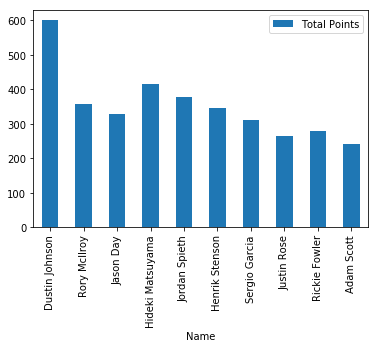

In [19]:
%matplotlib inline
top_ten = golf_ranking.head(10)
top_ten.plot('Name', 'Total Points', kind='bar')

### Import Point 
By webscraping the data, this plot can be updated each week automatically simply by re-running the script. Automating repetitive tasks is one of the key benefits of learning to program. Of course, writing and debugging programs takes time, so automation only pays when you need to do the same thing a lot of times. Often I ask myself, "Is this something would be faster to do editing by hand, or is it worth the time it takes to design, write and debug a program?"

### Student Challenge
This is just a writing exercise. Describe a website where you might be interested in scraping data on a regular basis. Include the URL. Maybe I'll look into it with you!

<a id='Mission'/a>
## Martian Challenge: NASA APIs
[Top of Notebook](#Top)

Naturally, NASA offer quite a few APIs, which you can read about [here](https://api.nasa.gov/). If you want to be a heavy user of these APIs (say, you're building an App for lots of users) then you need to sign up for a developer key. But if your needs are modest (you're not going to hit the API more than 30 times per hour from any given computer), then the DEMO API key is good enough. That's what we'll use.

### Example
** Look at the documentation on retrieving [Mars Rover Photos](https://api.nasa.gov/api.html#assets). ** In the example below, I retrieve and plot

https://api.nasa.gov/api.html#MarsPhotos

In [1]:
import requests
import json

# Look at the end of the url. This request is for Sol day 10, Front hazard avoidance camera
url = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&camera=fhaz&api_key=DEMO_KEY'

# Make the request
r = requests.get(url)

In [2]:
# Convert from bytes to unicode string
data = r.content.decode('utf-8')

# Read the json data
rover_metadata = json.loads(data)

In [16]:
# Print the dictionary of information returned by the query
# Notice that this is a complicated nested structure of lists and dictionaries inside a dictionary
rover_metadata

{'photos': [{'camera': {'full_name': 'Front Hazard Avoidance Camera',
    'id': 20,
    'name': 'FHAZ',
    'rover_id': 5},
   'earth_date': '2015-05-30',
   'id': 102693,
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'rover': {'cameras': [{'full_name': 'Front Hazard Avoidance Camera',
      'name': 'FHAZ'},
     {'full_name': 'Navigation Camera', 'name': 'NAVCAM'},
     {'full_name': 'Mast Camera', 'name': 'MAST'},
     {'full_name': 'Chemistry and Camera Complex', 'name': 'CHEMCAM'},
     {'full_name': 'Mars Hand Lens Imager', 'name': 'MAHLI'},
     {'full_name': 'Mars Descent Imager', 'name': 'MARDI'},
     {'full_name': 'Rear Hazard Avoidance Camera', 'name': 'RHAZ'}],
    'id': 5,
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'max_date': '2017-04-23',
    'max_sol': 1675,
    'name': 'Curiosity',
    'status': 'active',
    'total_photos': 313570},
  

The information we need is the img_src (image source), which provides the url for the image we wanted.

In [3]:
# Look carfully at the output of the previous cell and you'll see that
# img_src is a key in a dictionary that is in the first list that is in the dictionary named 'photos'.
# So we reference it this way:
rover_metadata['photos'][0]['img_src']

'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG'

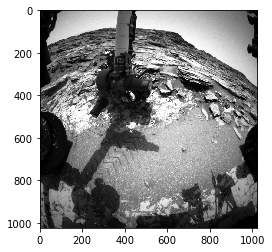

In [18]:
import urllib
import matplotlib.pyplot as plt

url = rover_metadata['photos'][0]['img_src']

# create a file-like object from the url
f = urllib.request.urlopen(url)

# read the image file in a numpy array
a = plt.imread(f, format='jpg')

# Plot the image using a greyscale (black and white) colormap
plt.imshow(a,  cmap='Greys_r')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

### Student Challenge: Your Mission
See if you can retrieve and plot an image from one of the other cameras.

## STUDENT FEEDBACK
Edit this markdown cell to provide feedback on this notebook. 

Specifically:

Roughly, how much time did you spend?

What, if anything, gave you trouble?

What part did you like best?


# Supplemental Activity
I assume you all have Google accounts.  Create your own Google spreadsheet with simple columns and headers. Make the sheet public and editable by anyone with the link, then see if you can write the python code to load the data into a Pandas dataframe and print it. Extras kudos if you plot the data too!
